<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/R14_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관분석
- 두 변수 x, y가 있을때 두 변수가 서로 어떤 관계에 있는지 분석하는 과정
- 보통 2개의 등간/비율 척도 변수를 분석할때 우선적으로 산점도를 그려 변수간의 관계를 시각화 한 후 상관계수를 계산

두 변수 정의 : 독립변수, 종속변수

- 독립변수 : 종속변수를 추정하거나 예측하는데 토대를 제공 (원인/설명 변수)
- 종속변수 : 예측되거나 추정되는 변수

독립변수와 종속변수는 인과관계를 가질 가능성이 높음 (원인-결과 관계)

예) A회사의 광고비 지출이 매출에 어느정도 영향을 주는지 파악하기 위해 광고비와 매출액간의 관계를 조사해 봄

In [1]:
ad <- c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales <- c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

1) 광고비와 매출액간의 연관성 파악을 위해 산포도로 시각화해 보세요

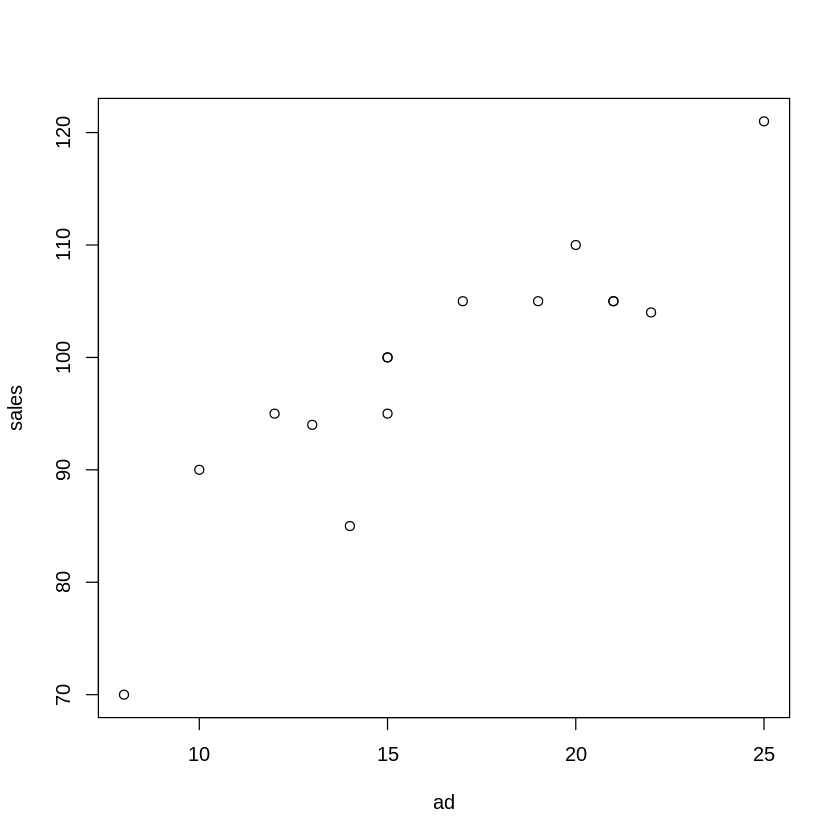

In [8]:
plot(ad, sales)

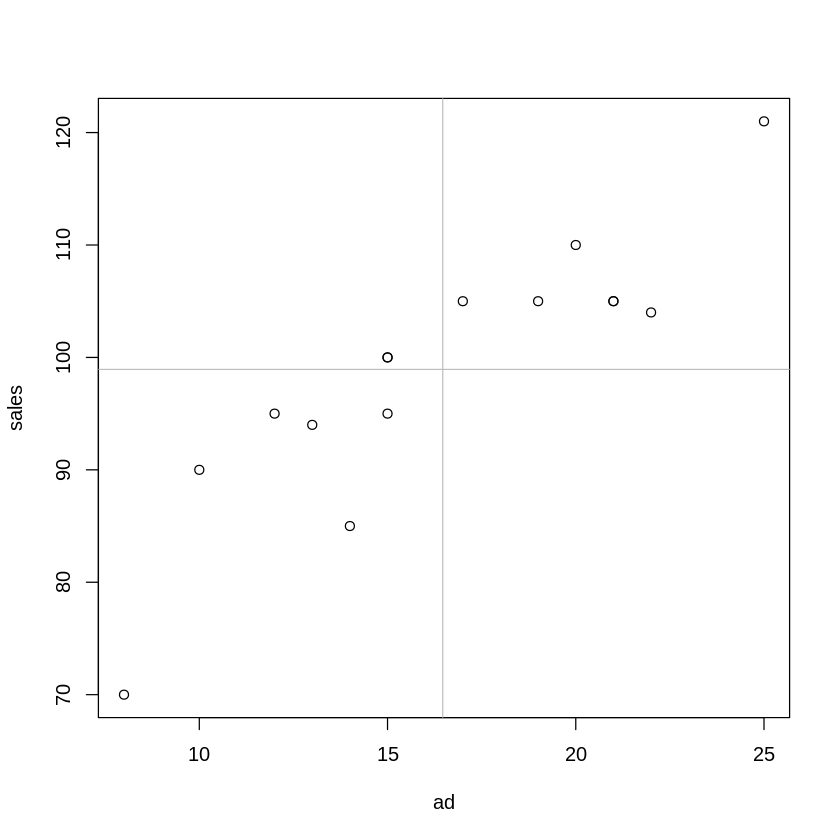

In [10]:
# 각 변수각의 상관정도를 파악하기 위해 변수의 평균을 기점으로 수직선 표시
plot(ad, sales)
abline(v = mean(ad), col = 'gray')
abline(h = mean(sales), col = 'gray')

2,4 사분면에 점들이 분포되어 있어, 독립/종속변수의 관계는 비례임을 짐작할 수 있음

# 상관관계correlation
- 두 변수 사이에 서로 주고 받는 관계가 있음
- 양,음,무 상관관계등 3가지 존재
- 상관계수를 사용 : 피어슨 상관 계수
- R에서는 cor 함수

# 상관계수
- 두 변수가 함께 변하는 정도를 -1~1 범위의 수치로 나타낸 것
- 단위로 인한 공분산의 차이를 어느 정도 보완해 줌
- 일반적으로 칼피어슨이 개발한 피어슨 상관계수를 사용함
- numpy의 corrcoef 함수를 사용함
- 상관계수 범위에 따른 상관정도 해석
* -1.0 ~ -0.7 : 매우 강한 음의 상관관계 있음
* -0.7 ~ -0.3 : 강한 음의 상관관계 있음
* -0.3 ~ -0.1 : 약한 음의 상관관계 있음
* -0.1 ~ 0.1 : 상관관계 없음
* 0.3 ~ 0.1 : 약한 양의 상관관계 있음
* 0.7 ~ 0.3 : 강한 양의 상관관계 있음
* 1.0 ~ 0.7 : 매우 강한 양의 상관관계 있음

# 공분산covariance

- 두 변수가 각 평균으로부터 떨어져 있는 정도를 구한 후 표본의 갯수로 나누어 계산한 것

- 하나의 x값이 평균보다 클 때 y도 평균보다 크면 두 편차의 곱은 양수.
- 반면 한 x값이 평균보다 클 때 y는 평균보다 작으면 편차의 곱으은 음수가 되는 점을 이용한 것.

- 결과가 양수 또는 음수로 나올수 있음

- 양수 -> 양의 상관관계 있음 (x증가->y증가)
- 음수 -> 음의 상관관계 있음 (x증가->y감소)

- R에서는 cov 함수

광고비와 매출간의 상관계수와 공분산 계산

In [14]:
cor(ad, sales) # 0.89 로 양의 상관관계

[1] 0.8879209

In [16]:
cov(ad,sales) # 50 로 양의 상관관계

[1] 50.24762

예) applewood 자동차판매 데이터 기초로 구매자 연령과 판매이익간의 상관 계수를 게산하고 상관분석을 하시오


In [46]:
aw <- read.csv("https://raw.githubusercontent.com/siestageek/datasets/master/txt/applewood.txt", sep = " ")
head(aw)

,Age,Profit,Location,Vehicle.Type,Previous
,<int>,<chr>,<chr>,<chr>,<int>
1,21,"$1,387",Tionesta,Sedan,0
2,23,"1,754",Sheffield,SUV,1
3,24,"1,817",Sheffield,Hybrid,1
4,25,"1,040",Sheffield,Compact,0
5,26,"1,273",Kane,Sedan,1
6,27,"1,529",Sheffield,Sedan,1


In [41]:
str(aw)

'data.frame':	180 obs. of  5 variables:
 $ Age         : int  21 23 24 25 26 27 27 28 28 29 ...
 $ Profit      : chr  "$1,387" "1,754" "1,817" "1,040" ...
 $ Location    : chr  "Tionesta" "Sheffield" "Sheffield" "Sheffield" ...
 $ Vehicle.Type: chr  "Sedan" "SUV" "Hybrid" "Compact" ...
 $ Previous    : int  0 1 1 0 1 1 0 1 0 0 ...


In [47]:
age <- aw$Age
profit <- aw$Profit

In [25]:
# 특정문자 제거 : str_remove_all(대상, '제거할 문자')
library(stringr)

In [48]:
profit <- str_remove_all(profit,',')
profit <- str_remove_all(profit,'\\$')
profit <- as.integer(profit)
head(profit)

[1] 1387 1754 1817 1040 1273 1529

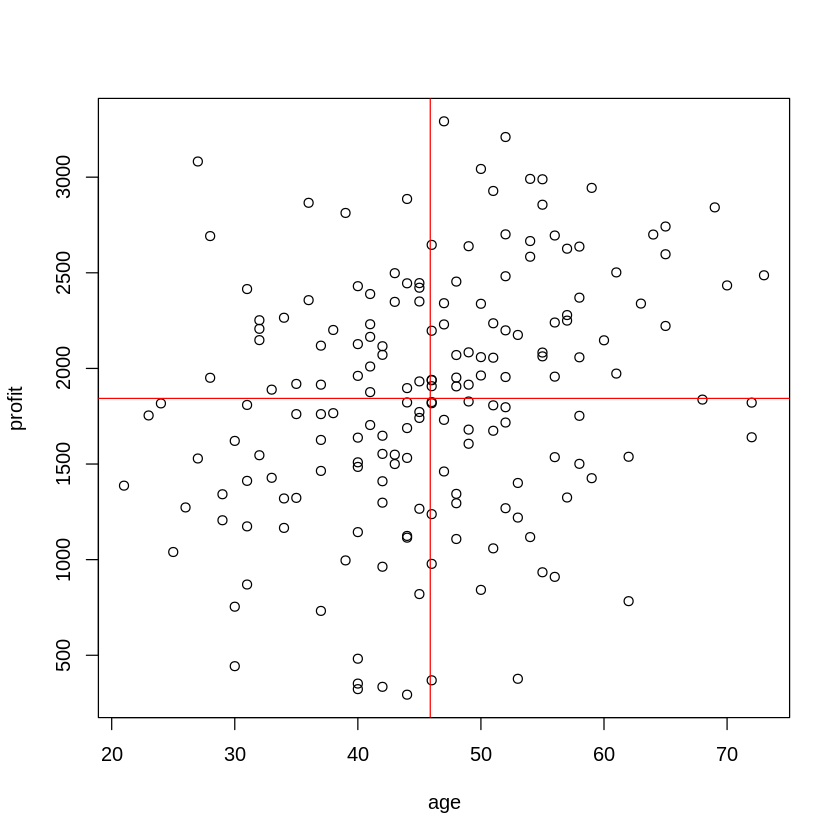

In [53]:
plot(age, profit)
abline(v = mean(age), col = 'red')
abline(h = mean(profit), col = 'red')

In [50]:
cov(age, profit)

[1] 1774.489

In [52]:
cor(age, profit) # 0.3 ~ 0.1 : 약한 양의 상관관계 있음

[1] 0.261529

결론 : 매자 연령과 판매이익은 그리 크지 않음